In [12]:
import sys
sys.path.append('../../..')

## Dataset Generation

In [13]:
import lasp.filters.linear
import lasp.noise
import lasp.io
import lasp.convert

import pathlib

import numpy

import scipy.signal
import scipy.io

import matplotlib.pyplot

input_path = pathlib.Path('inputs')

filenames = [
    input_path / 'Baboon.bmp',
    input_path / 'Boats.bmp',
    input_path / 'Cameraman.bmp',
    input_path / 'Goldhill.bmp',
    input_path / 'Peppers.bmp'
]

NB_IMAGES = len(filenames)

imgs = [ lasp.io.read(image_path=filename).astype(dtype=numpy.double) for filename in filenames ]

kernel = lasp.filters.linear.gaussian_filter(size=7, sigma=3)
imgs_blurred = [ scipy.signal.convolve2d(img, kernel, mode='same') for img in imgs ]

SNR = 20
imgs_noised = [ lasp.noise.awgn(img, SNR) for img in imgs_blurred ]



print('SNR :', SNR)
print('NB_IMAGES :', NB_IMAGES)
for i in range(0, NB_IMAGES):
    print(imgs[i].shape, imgs_blurred[i].shape, imgs_noised[i].shape)

SNR : 20
NB_IMAGES : 5
(512, 512) (512, 512) (512, 512)
(576, 720) (576, 720) (576, 720)
(256, 256) (256, 256) (256, 256)
(512, 512) (512, 512) (512, 512)
(512, 512) (512, 512) (512, 512)


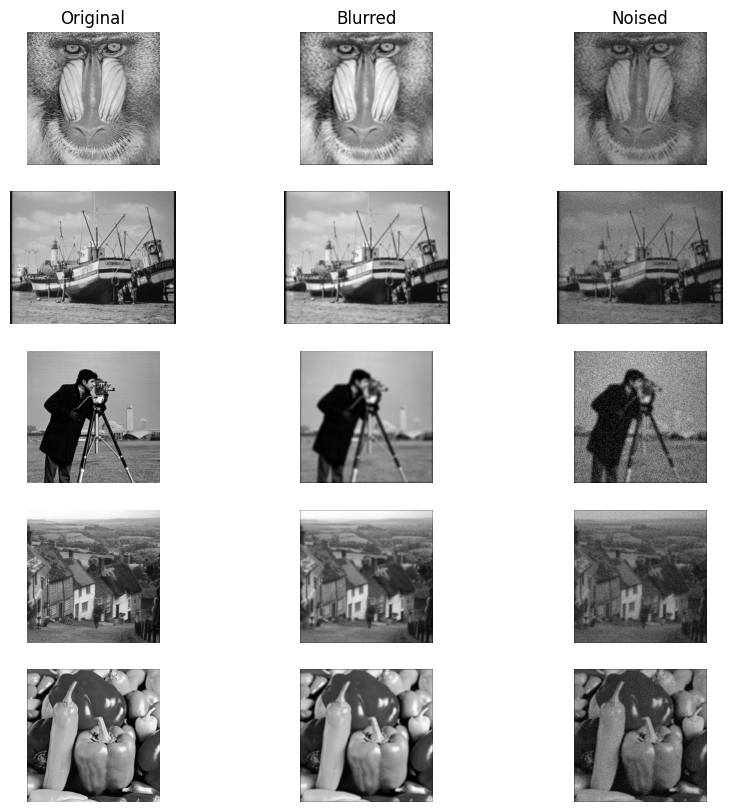

In [14]:
figure = matplotlib.pyplot.figure(figsize=(10, 10))


for i in range(0, NB_IMAGES):

    original = imgs[i]
    blurred = imgs_blurred[i]
    noised = imgs_noised[i]

    matplotlib.pyplot.subplot(NB_IMAGES, 3, i*3+1)
    matplotlib.pyplot.axis('off')
    if(i == 0):
        matplotlib.pyplot.title('Original')
    matplotlib.pyplot.imshow(original, cmap='gray')

    matplotlib.pyplot.subplot(NB_IMAGES, 3, i*3+2)
    matplotlib.pyplot.axis('off')
    if(i == 0):
        matplotlib.pyplot.title('Blurred')
    matplotlib.pyplot.imshow(blurred, cmap='gray')

    matplotlib.pyplot.subplot(NB_IMAGES, 3, i*3+3)
    matplotlib.pyplot.axis('off')
    if(i == 0):
        matplotlib.pyplot.title('Noised')
    matplotlib.pyplot.imshow(noised, cmap='gray')

matplotlib.pyplot.show()
   


## Save dataset

In [15]:
path_dataset = pathlib.Path('dataset_1')
if not(path_dataset.exists()):
    path_dataset.mkdir()

datas_matlab = {}
lasp.io.save(kernel, path_dataset / 'kernel.npy')
datas_matlab['kernel'] = kernel


for i in range(0, NB_IMAGES):

    original = imgs[i]
    blurred = imgs_blurred[i]
    noised = imgs_noised[i]
    
    name = filenames[i].stem

    lasp.io.save(original, data_path = path_dataset / (name+'Original'+'.npy'))
    lasp.io.save(blurred, data_path = path_dataset / (name+'Blurred'+'.npy'))
    lasp.io.save(noised, data_path = path_dataset / (name+'Noised'+'.npy'))

    datas_matlab[name+'Original'] = original
    datas_matlab[name+'Blurred'] = blurred
    datas_matlab[name+'Noised'] = noised


scipy.io.savemat(path_dataset / 'datas.mat', datas_matlab)